In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data
import nnfs

nnfs.init()

In [5]:
from model.optimizers.adam import OptimizerAdam
from model.loss.binary_crossentropy import BinaryCrossentropy
from model.layers.dense import DenseLayer
from model.loss.mean_squared_error import MeanSquaredError

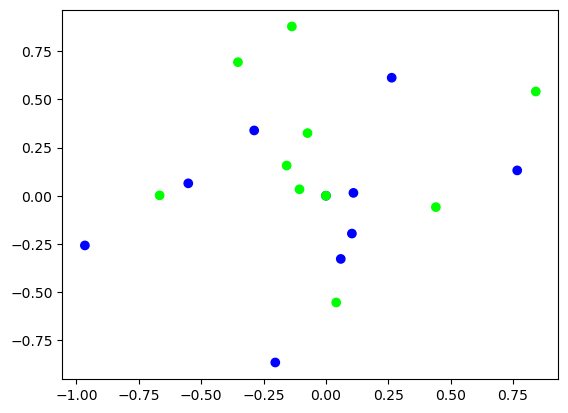

In [6]:
x, y = spiral_data(samples=10, classes=2)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='brg')
y = y.reshape(-1, 1)
plt.show()

In [4]:
dense1 = DenseLayer(64, 2, activation='Relu', weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
dense2 = DenseLayer(1, 64, activation='Sigmoid')

loss_function = BinaryCrossentropy()
optimizer = OptimizerAdam(decay=5e-7)

for epoch in range(10001):
    dense1_outputs = dense1.forward(x)
    dense2_outputs = dense2.forward(dense1_outputs)

    data_loss = loss_function.calculate(dense2_outputs, y)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)
    loss = data_loss + regularization_loss

    predictions = (dense2_outputs > 0.5) * 1
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, '
              f'loss: {loss:.3f} (data loss: {data_loss:.3f}, reg loss: {regularization_loss:.3f}), '
              f'accuracy: {accuracy:.3f}, '
              f'lr: {optimizer.current_learning_rate:.5f}')

    loss_outputs = loss_function.backward(dense2_outputs, y)
    dense2_inputs_prime = dense2.backward(loss_outputs)
    dense1_inputs_prime = dense1.backward(dense2_inputs_prime)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

Error evaluating: thread_id: pid_15800_id_2858916570864
frame_id: 2859024890192
scope: FRAME
attrs: self	inputs
Traceback (most recent call last):
  File "C:\Program Files\JetBrains\PyCharm 2024.1.4\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_vars.py", line 315, in resolve_compound_variable_fields
    return _typeName, _resolve_default_variable_fields(var, resolver, offset)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\JetBrains\PyCharm 2024.1.4\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_vars.py", line 265, in _resolve_default_variable_fields
    return resolver.get_dictionary(VariableWithOffset(var, offset) if offset else var)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\JetBrains\PyCharm 2024.1.4\plugins\python\helpers\pydev\pydevd_plugins\extensions\types\pydevd_plugin_numpy_types.py", line 95, in get_dictionary
    ret['min'] = obj.min()
       

KeyboardInterrupt: 

Accuracy: 0.500


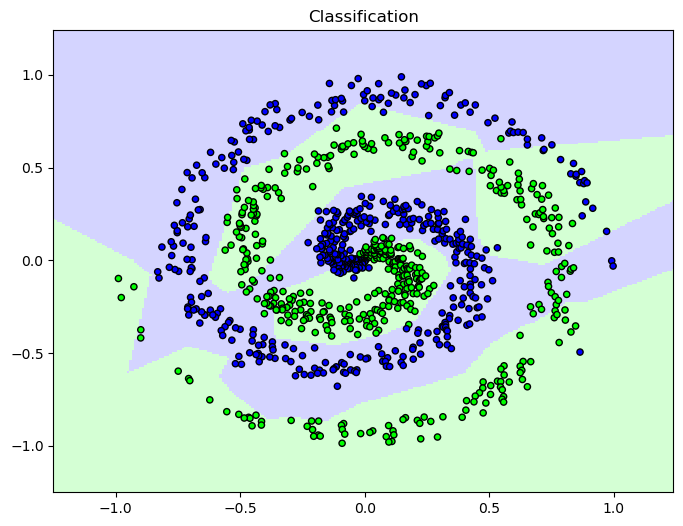

In [6]:
from matplotlib.colors import ListedColormap

def predict(x):
    dense1_outputs = dense1.forward(x)
    dense2_outputs = dense2.forward(dense1_outputs)

    return dense2_outputs


x_test, y_test = spiral_data(samples=500, classes=2)
outputs = predict(x_test)

predictions = (outputs > 0.5) * 1
accuracy = np.mean(predictions == y_test)

h = 0.01
x_min, x_max = -1.25, 1.25
y_min, y_max = -1.25, 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

outputs = predict(np.c_[xx.ravel(), yy.ravel()])
z = (outputs > 0.5) * 1
z = z.reshape(xx.shape)

cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#00FF00', '#0000FF'])
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, z, cmap=cmap_light, alpha=0.5)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Classification")
print(f'Accuracy: {accuracy:.3f}')
plt.show()

In [10]:
x, y = nnfs.datasets.sine_data()

dense1 = DenseLayer(64, 1, activation='Relu')
dense2 = DenseLayer(64, 64, activation='Relu')
dense3 = DenseLayer(1, 64)

loss_function = MeanSquaredError()
optimizer = OptimizerAdam(learning_rate=0.005, decay=1e-3)
accuracy_precision = np.std(y) / 250

for epoch in range(10001):
    dense1_outputs = dense1.forward(x)
    dense2_outputs = dense2.forward(dense1_outputs)
    dense3_outputs = dense3.forward(dense2_outputs)

    data_loss = loss_function.calculate(dense3_outputs, y)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2) + loss_function.regularization_loss(dense3)
    loss = data_loss + regularization_loss

    accuracy = np.mean(np.absolute(dense3_outputs - y) < accuracy_precision)

    if not epoch % 100:
        print(f'epoch: {epoch}, '
              f'loss: {loss:.3f}, '
              f'accuracy: {accuracy:.3f}, '
              f'lr: {optimizer.current_learning_rate:.5f}')

    loss_outputs = loss_function.backward(dense3_outputs, y)
    dense3_inputs_prime = dense3.backward(loss_outputs)
    dense2_inputs_prime = dense2.backward(dense3_inputs_prime)
    dense1_inputs_prime = dense1.backward(dense2_inputs_prime)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()

epoch: 0, loss: 0.500, accuracy: 0.002, lr: 0.00500
epoch: 100, loss: 0.083, accuracy: 0.006, lr: 0.00455
epoch: 200, loss: 0.036, accuracy: 0.018, lr: 0.00417
epoch: 300, loss: 0.031, accuracy: 0.169, lr: 0.00385
epoch: 400, loss: 0.031, accuracy: 0.373, lr: 0.00357
epoch: 500, loss: 0.031, accuracy: 0.399, lr: 0.00334
epoch: 600, loss: 0.031, accuracy: 0.412, lr: 0.00313
epoch: 700, loss: 0.031, accuracy: 0.180, lr: 0.00294
epoch: 800, loss: 0.031, accuracy: 0.129, lr: 0.00278
epoch: 900, loss: 0.031, accuracy: 0.447, lr: 0.00263
epoch: 1000, loss: 0.031, accuracy: 0.278, lr: 0.00250
epoch: 1100, loss: 0.031, accuracy: 0.467, lr: 0.00238
epoch: 1200, loss: 0.031, accuracy: 0.462, lr: 0.00227
epoch: 1300, loss: 0.031, accuracy: 0.471, lr: 0.00217
epoch: 1400, loss: 0.031, accuracy: 0.470, lr: 0.00208
epoch: 1500, loss: 0.031, accuracy: 0.491, lr: 0.00200
epoch: 1600, loss: 0.031, accuracy: 0.492, lr: 0.00192
epoch: 1700, loss: 0.031, accuracy: 0.160, lr: 0.00185
epoch: 1800, loss: 0.0

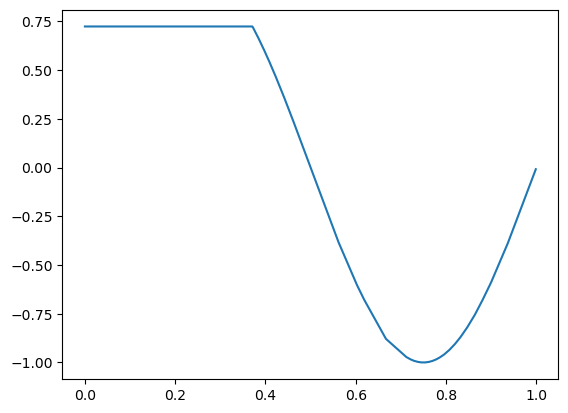

In [14]:
x_test, y_test = nnfs.datasets.sine_data()

dense1_outputs = dense1.forward(x_test)
dense2_outputs = dense2.forward(dense1_outputs)
dense3_outputs = dense3.forward(dense2_outputs)

plt.plot(x_test, dense3_outputs)
plt.show()